<a href="https://colab.research.google.com/github/Valepowell/clase_test/blob/main/Examen_de_Certificaci%C3%B3n_%E2%80%93_Intento_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Limpieza de datos con Python:**
- Identificar y solucionar cualquier valor duplicado.
- Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
- Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
- Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
- Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [ ]:
# Usamos la biblioteca google para poder usar archivos en nuestro drive.
from google.colab import drive
# Este comando conecta colab con drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos pandas con el nombre "pd" por buena practica.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# Importamos una bbdd en formato excel y lo guardamos en una variable.
path = "/content/drive/MyDrive/BBDD/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path)

In [ ]:
# Validar la data cargada.
df.info()

In [ ]:
# Validar la data cargada.
df.head(10)

In [ ]:
# Revisar los typo de datos.
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
# Limpiamos las columnas de espacios y mayusculas
df.columns = df.columns.str.lower().str.strip()

In [ ]:
df.info()

In [ ]:
# Revisar duplicados. No hay
df.duplicated().sum()

np.int64(0)

In [ ]:
# Identificar valores nulos en todo el DataFrame, se visualizan 11 en el campo totalcharges
print(df.isnull().sum())

In [ ]:
# Comenzamos viendo los null de totalcharges  11.
df["TotalCharges"].value_counts()

In [ ]:
dict_1 = {
    " ": "-",
}
df["TotalCharges"] = df["TotalCharges"].replace(dict_1)
print(df["TotalCharges"].dtype)

object


In [ ]:
df.head()

Nota: Supuesto segun data se determina que TotalChange es la multiplicacion de "tenure" * "MonthlyCharges"
 Por lo que los valores nulos se reemplazaran por este calculo.

In [ ]:
df.loc[
    (df["TotalCharges"] == '-') | (df["TotalCharges"].isna()),
    "TotalCharges"
] = df["tenure"] * df["MonthlyCharges"]

In [ ]:
# Usar .astype() para cambiar tipos de datos.
# Reemplaza espacios vacíos por NaN (si los hay)
#df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

# Convierte a tipo float
df["TotalCharges"] = df["TotalCharges"].astype(float)

# Verifica el nuevo tipo
print(df["TotalCharges"].dtype)

float64


In [ ]:
# Asegura tipo numérico
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
# Asegúrate de que TotalCharges esté en float
df["tenure"] = df["tenure"].astype(float)
#df["tenure"] = pd.to_numeric(df["tenure"], errors='coerce')

In [ ]:
# Vañlidamos que se haya realizado el cambio de typo Object a Float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


In [ ]:
# Ver las filas que tienen TotalCharges en 0.0, como ternure es 0 no se ve reflejado el cambio de aplicar la multiplicación,
# pedro si a nivel de datos es posible trabajarlos
df[df["TotalCharges"] == 0.0][["tenure", "MonthlyCharges", "TotalCharges"]]

,tenure,MonthlyCharges,TotalCharges
488,0.0,52.55,0.0
753,0.0,20.25,0.0
936,0.0,80.85,0.0
1082,0.0,25.75,0.0
1340,0.0,56.05,0.0
3331,0.0,19.85,0.0
3826,0.0,25.35,0.0
4380,0.0,20.00,0.0
5218,0.0,19.70,0.0
6670,0.0,73.35,0.0


In [ ]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
0.00,11
20.20,11
19.75,9
20.05,8
19.90,8
...,...
130.15,1
3211.90,1
7843.55,1


**Exploración de datos con Python:**
- Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [ ]:
# Se remonbramos la data limpia para no pasarla a llevar y se visualiza para realizar el análisis.

df_1= df
df_1.head()

In [ ]:
# Preparar data.
InternetServ = df[['InternetService']].value_counts().sort_index()
InternetServ

,count
InternetService,
DSL,2421
Fiber optic,3096
No,1526


In [ ]:
# Preparar data.
InternetServ = df[["InternetService"]].value_counts().sort_index()
InternetServ

,count
InternetService,
DSL,2421
Fiber optic,3096
No,1526


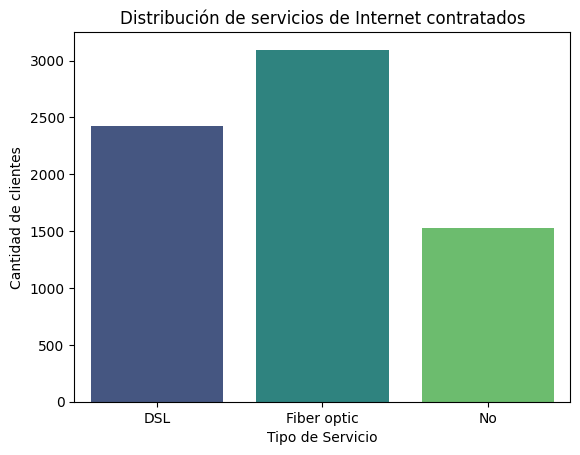

In [ ]:
# VISUALIZACIÓN 1: UNIVARIADA - Distribución de servicios de Internet contratados

# preparacion de la data para graficar
internet_df = InternetServ.reset_index()
internet_df.columns = ["servicios", "Cantidad"]

# Cantidad de servicio de Internet contratados.
sns.barplot(data=internet_df, x="servicios", y="Cantidad", palette="viridis")
plt.title("Distribución de servicios de Internet contratados")
plt.xlabel("Tipo de Servicio")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.show()

# Interpretación:
# La empresa ofrece 3 servicios de Internet diferentes
# Se observa una mayor preferencia por los servicios de Fibra Optica, seguido
# de los ervicios de DSL y No
# Nota: Paleta de color extraida de https://rpubs.com/mjvoss/psc_viridis

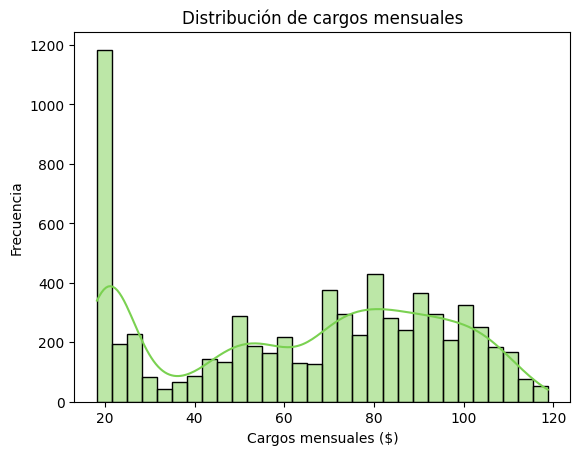

In [ ]:
# VISUALIZACIÓN 2: UNIVARIADA - Histograma de MonthlyCharges

sns.histplot(data=df, x="MonthlyCharges", bins=30, kde=True, color="#7AD151FF")
plt.title("Distribución de cargos mensuales")
plt.xlabel("Cargos mensuales ($)")
plt.ylabel("Frecuencia")
plt.show()
# Interpretación:
# Según el grafico, la mayoría de los clientes pagan entre $20 y $100 mensuales.
# Se observa una densidad mayor alrededor de los $70.
# Nota: Paleta de color extraída de https://rpubs.com/mjvoss/psc_viridis
# valor hexadecimal

- Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código

In [ ]:
# VISUALIZACIÓN 3: MULTIVARIADA - Scatter Monthly vs TotalCharges por contrato

# preparacion de la data para graficar
pagoxmes = df.groupby('MonthlyCharges')['TotalCharges'].sum()
pagoxmes

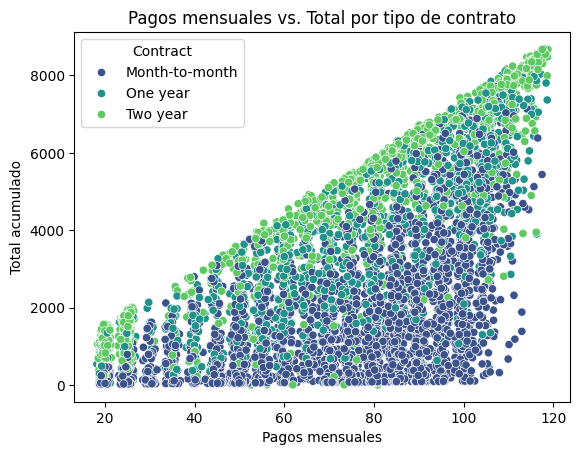

In [ ]:
# Definicion de gráfico
sns.scatterplot(data=df, x="MonthlyCharges", y="TotalCharges", hue="Contract", palette="viridis")
plt.title("Pagos mensuales vs. Total por tipo de contrato")
plt.xlabel("Pagos mensuales")
plt.ylabel("Total acumulado")
plt.show()

# Interpretación:
# Clientes con contratos de largo plazo tienden a acumular cargos totales más altos.
# Los clientes con contrato mensual tienen mayor variabilidad.

In [ ]:
# VISUALIZACIÓN 4: MULTIVARIADA - MonthlyCharges vs Churn (tasa de cancelación de clientes)

# preparacion de la data para graficar
tasacancelacion = df.groupby('MonthlyCharges')['Churn'].value_counts()
tasacancelacion

,,count
MonthlyCharges,Churn,
18.25,No,1
18.40,No,1
18.55,No,1
18.70,No,2
18.75,No,1
...,...,...
118.20,No,1
118.35,Yes,1
118.60,No,2


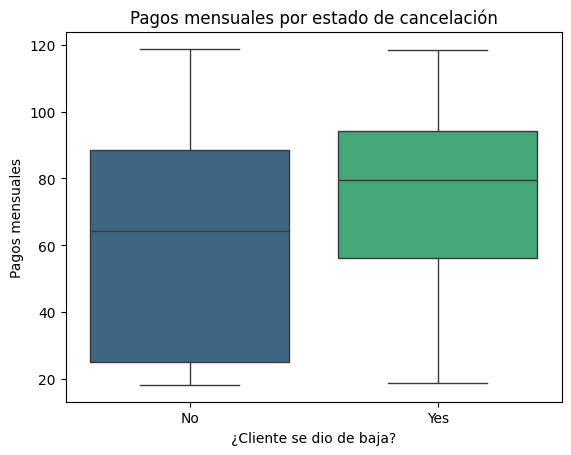

In [ ]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", hue="Churn", palette="viridis")
plt.title("Pagos mensuales por estado de cancelación")
plt.xlabel("¿Cliente se dio de baja?")
plt.ylabel("Pagos mensuales")
plt.xticks(rotation=0)
plt.show()

# Interpretación:
# Los clientes que se dieron de baja tienden a tener pagos mensuales más altos.
# Esto sugiere que precios más elevados podrían influir en la cancelación.

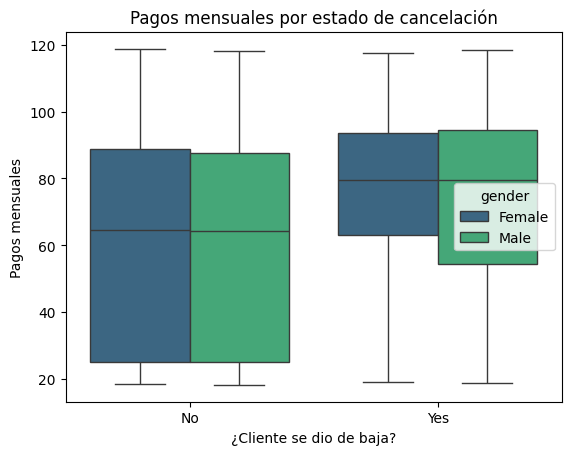

In [ ]:
# Otra visualización de los contratos cancelados clasificados por género

sns.boxplot(data=df, x="Churn", y="MonthlyCharges", hue="gender", palette="viridis")
plt.title("Pagos mensuales por estado de cancelación")
plt.xlabel("¿Cliente se dio de baja?")
plt.ylabel("Pagos mensuales")
plt.xticks(rotation=0)
plt.show()

# Interpretación:
# La mayor cantidad de clientes que se dieron de baja tienden a ser mújeres,
# se puede inferir que les efecta más tener pagos mensuales más altos.
# Esto sugiere que precios más elevados podrían influir en la cancelación.